# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>

----
### <center>Nome e RA dos componentes do grupo</center>

    
| Nome     |      RA      | 
|:-        |:-------------:|
|Gabriel Moreira Dias|200903| 
|          |              | 
|          |              | 
|          |              | 
|          |              | 
    

----
### Instruções
**1**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções

**2**. O trabalho pode ser feito em grupos de até 5 pessoas. Porém, todos os componentes devem ser da mesma turma de Processamento de Imagens. 
 - Caso algum grupo contenha alguém de uma turma diferente, todo o grupo receberá nota zero.
 - Apenas uma pessoa do grupo deve submeter o trabalho. 
 - Você deve submeter apenas o arquivo .ipynb.

**3**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**4**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos. 

**5**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

**6**. A única biblioteca de processamento de imagens permitida neste trabalho é a **OpenCV**. Porém, alguns exercícios poderão limitar algumas funções dessa biblioteca que poderão ser usadas. 

**7**. Em todos os exercícios que pedirem para salvar a imagem resultante, tome cuidado de converter a imagem para BGR antes de salvá-la pois esse é o formato padrão da biblioteca OpenCV. Caso contrário, os canais de cores da imagem resultante ficarão trocados. 

**8**. Em todos os exercícios, caso o resultado seja uma ou mais imagens, você deve mostrá-las na tela. 

----
## Exercício 1

Implemente uma função que consiga fazer a detecção de movimentos em um vídeo. Ela deverá extrair os frames do vídeo e, para cada frame, deve calcular o **histograma** da imagem e compará-lo com os últimos histogramas calculados. Quando a diferença entre estes ultrapassar um limiar pré-estabelecido, simule um alarme interrompendo a função e retornando uma mensagem de alerta. Utilize uma função de comparação que julgar conveniente. 
- A diferença entre dois histogramas pode ser calculada por meio de medidas estatísticas, como média, desvio padrão, mediana, IQR, etc. 

Teste a função no vídeo *videos/cameraEscondida.mp4*.

In [22]:
import cv2

def desvioPadrao(hist):
    somatorio = 0
    for i in range(len(hist)):
        somatorio += (hist[i] - hist.mean()) * (hist[i] - hist.mean())
    return (somatorio/len(hist)) ** 0.5
    

def detectaMov(videoSrc, limiar=1):
    cap = cv2.VideoCapture(videoSrc)
    if not cap.isOpened():
        print('Erro ao abrir o arquivo de vídeo.')

    last_hist = None

    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    desvioPadrao(hist)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

        if last_hist is not None:
            hist_diff = abs(desvioPadrao(hist) - desvioPadrao(last_hist))
            if hist_diff > limiar:
                print("Movimento detectado!")
                break
        
        last_hist = hist
    
    cap.release()
    cv2.destroyAllWindows()

detectaMov('./videos/cameraEscondida.mp4')

Movimento detectado!


----
## Exercício 2


Implemente um algoritmo que faça a combinação das imagens **figs/facensLogo.png** e **facensVistaAerea.webp** para gerar o resultado apresentado abaixo. Salve a imagem resultante na pasta **figsResultado** com o nome **ex02.png**

Para atingir esse resultado, as únicas funções da biblioteca **OpencCV** que poderão ser aplicadas são: **warpAffine**, **getRotationMatrix2D**, **resize**, **cvtColor** e aquelas que sirvam para abrir ou salvar uma imagem. Todas as demais operações deverão ser implementadas por meio de operações matriciais, podendo ser aplicadas função da biblioteca **NumPy**. 

**Dicas**: 
- Divida a imagem **facensVistaAerea.webp** em quatro partes iguais. Depois disso, aplique rotação em cada uma das 4 partes.
- Para remover o fundo da imagem **figs/facensLogo.png**, você pode usar a segmentação por limiarização. Depois disso, você pode rotacionar cada uma dos quatro quadrantes para conseguir atingir o efeito mostrado na imagem abaixo.
- Você pode usar as operações de soma e de escalamento para ajudar a atingir a imagem alvo.

<center>
<div style="display:inline-block;">
    <div style="padding: 5px; float: left;">
        <img src="figsNotebook/facens1.jpg" width="400" height="400" />
    </div>
</div> 
</center>

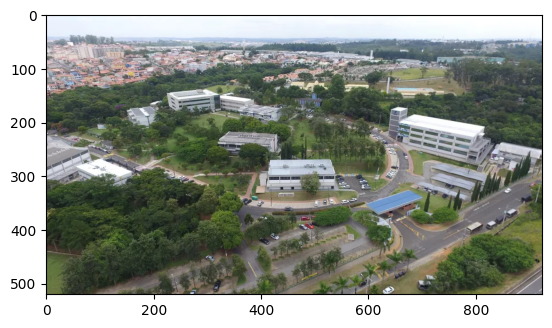

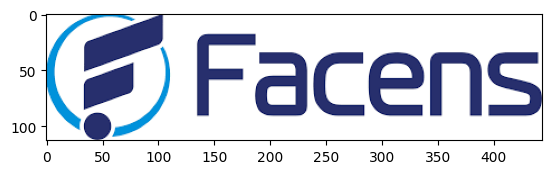

In [11]:
import cv2
import matplotlib.pyplot as plt

imagemFacensVista = cv2.cvtColor(cv2.imread('./figs/facensVistaAerea.webp'), cv2.COLOR_BGR2RGB)
logoFacens = cv2.cvtColor(cv2.imread('./figs/facensLogo.png'), cv2.COLOR_BGR2RGB)

plt.imshow(imagemFacensVista)
plt.show()

plt.imshow(logoFacens)
plt.show()

----
## Exercicio 3

Implemente uma função que receba uma imagem e retorne três imagens novas: uma contendo apenas os objetos com cor predominantemente vermelhas, outro com os objetos que possuem cor predominantemente verde e uma com os objetos com cor predominantemente azuis. Os demais objetos devem desaparecer da imagem resultante, transformando seus pixels para o valor 0. 

Para atingir o objetivo deste exercício é permitido usar apenas a biblioteca NumPy. As únicas funções da biblioteca OpenCV permitidas são a **cvtColor** e aquelas que abrem ou salvam uma imagem. 

Teste sua função passando como entrada a imagem **figs/objetos.png**. Salve as imagens resultantes na pasta "**figsResultado**" com os seguintes nomes: **ex03_objetosVermelhos.png**, **ex03_objetosVerdes.png** e **ex03_objetosAzuis.png**.

Dicas: 

 - Usando a biblioteca Numpy, é possível selecionar apenas os valores de uma determinada matriz que atendem a mais de uma restrição. Por exemplo, supondo que você queira transformar os valores de uma matriz que sejam maiores que 50 e menores que 100 para -1, você poderia aplicar a seguinte operação:

```matriz[ (matriz>50) & (matriz<100) ] = -1 ```

In [1]:
import numpy as np
import cv2

def separa_cores(img):

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    faixas_cores = [
        ([0, 70, 50], [10, 255, 255]),   # vermelho
        ([40, 70, 50], [80, 255, 255]),  # verde
        ([100, 70, 50], [140, 255, 255]) # azul
    ]

    mascaras = []
    for (cor_min, cor_max) in faixas_cores:
        cor_min = np.array(cor_min, dtype=np.uint8)
        cor_max = np.array(cor_max, dtype=np.uint8)
        mascara = cv2.inRange(hsv, cor_min, cor_max)
        mascaras.append(mascara)

    vermelho = cv2.bitwise_and(img, img, mask=mascaras[0])
    verde = cv2.bitwise_and(img, img, mask=mascaras[1])
    azul = cv2.bitwise_and(img, img, mask=mascaras[2])

    return vermelho, verde, azul

img = cv2.imread('figs/objetos.png')

vermelho, verde, azul = separa_cores(img)

cv2.imwrite('figsResultado/ex03_objetosVermelhos.png', vermelho)
cv2.imwrite('figsResultado/ex03_objetosVerdes.png', verde)
cv2.imwrite('figsResultado/ex03_objetosAzuis.png', azul)


True

----
## Exercicio 4


Faça uma função que desenhe um rosto. Essa função deve receber como parâmetro a cor do rosto, dos olhos, do nariz e da boca. 

A função deve funcionar para todas as cores primárias, secundárias e, também, preto e branco. No entanto, só é permitido criar os objetos que formam o rosto com as cores primárias. Para gerar objetos com preto, branco e cores secundárias, você deverá fazer operações aritméticas usando objetos gerados com as cores primárias. 

Por exemplo, supondo que essa função tenha recebido rosto="preto", olhos="vermelho", nariz="branco", boca="verde" como entrada, ela deveria produzir o rosto similar ao mostrado abaixo. 

-  Neste exercício é permitido usar apenas a biblioteca NumPy. As únicas funções da biblioteca OpenCV permitidas são a **cvtColor** e aquelas que abrem ou salvam uma imagem. 

- A imagem resultante não precisa ser igual a mostrada no exemplo. Pode exercer sua criatividade, desde que o rosto, olhos, boca e nariz sejam criados por meio de operações matriciais.

- Teste sua função com três entradas diferentes e salve as imagens na pasta **figsResultado** com os nomes: ex04_rosto1.png, ex04_rosto2.png, ex04_rosto3.png


<center>
<div style="display:inline-block;">
    <div style="padding: 5px; float: left;">
        <img src="figsNotebook/rosto.png" width="150" height="150" />
    </div>
</div> 
</center>

----
## Exercicio 5

Utilize operações morfológicas nas imagens **figs/manequim.png** e **figs/tabuleiro.jpg** para remover todos os pontos brancos. Por outro lado, use as operaçòes morfológicas para remover apenas os círculos menores da imagem **figs/circulos.tif**, deixando apenas os círculos maiores. 


Salve as imagens resultantes na pasta **figsResultado** com os nomes ex05_manequim.png, ex05_tabuleiro.png e ex05_circulos.png.

----
## Exercicio 6

Aplique um filtro para borrar as extremidades da imagem **figs/vista.jpg** para que ela fique com o efeito mostrado na imagem abaixo. Salve a imagem resultante na pasta **figsResultado** com o nome **ex06_vista.png**

<img src="figsNotebook/vista_blur.jpg" width="500" height="128" />

----
## Exercicio 7

Sabe-se que as técnicas de filtragem podem ser usadas para eliminar ruídos. Porém, elas também podem perder detalhes da imagem. Uma forma de diminuir o problema da perda de detalhes é aplicar um realce na imagem após a filtragem. 

Sabe-se também que é possível aplicar realce combinando a imagem filtrada com a o resultado da sua detecção de bordas. 

Com base nas afirmações acima, aplique pelo menos dois filtros na imagem **figs/lena_noise.png** para diminuir o ruído. Depois, para aumentar o realce, faça uma operação aritmética de cada uma das imagens filtradas com o resultado da detecção de bordas por meio da técnica de Frei-Chen e outras duas técnicas de detecção de bordas quaisquer. Salve as imagens resultantes na pasta **figsResultado** com os nomes: "ex07_filtro1borda1.png", "ex07_filtro2borda1.png", "ex07_filtro1borda2.png", "ex07_filtro2borda2.png"  "ex07_filtro3borda1.png", "ex07_filtro3borda2.png".

 - trate os tons de cinza inválidos usando a técnica de saturação

----
## Exercicio 8

Sabe-se que as técnicas de filtragem podem ser usadas para eliminar ruídos. Porém, elas também podem perder detalhes da imagem. Uma forma de diminuir o problema da perda de detalhes é aplicar um realce na imagem após a filtragem. 

Repita os códigos que você fez no exercício anterior para filtragem da imagem **figs/lena_noise.png**. Use as duas imagens resultantes como entrada de duas funções. A primeira deve fazer o realce combinando as técnicas de top-hat e bottom-hat. A segunda deve fazer o realce usando a seginte equação:
    
\$$g = 
\begin{cases}
f \ominus b \text{, } & \text{ se } f - (f \ominus b) <  ( f \oplus b ) - f \\
f \oplus b\text{, } & \text{ caso contrário }
\end{cases}
$$

Na equação acima,  $f \ominus b$ é o resultado da operação de erosão no pixel $f$ usando o elemento estruturante $b$. Por outro lado, $f \oplus b$ é o resultado da operação de dilatação no pixel $f$ usando o elemento estruturante $b$.

Salve as imagens resultantes na pasta **figsResultado** com os nomes: "ex08_filtro1morfologia1.png", "ex08_filtro2morfologia1.png", "ex08_filtro1morfologia2.png", "ex08_filtro2morfologia2.png".
  

----
## Exercicio 9

Por meio das técnicas aprendidas na disciplina, tente melhorar o **máximo** possível a imagem **figs/lena_pontilhada.png**. Salve a imagem resultante na pasta **figsResultado** com o nome **ex09.png**

----
## Exercício 10

Crie duas funções chamadas **esteg** e **decodificaEsteg**. A primeira função deve implementar uma técnica de esteganografia que consiste em camuflar uma mensagem em uma imagem. A segunda função deve decodificar a imagem gerada pela primeira.

A função **esteg** deve receber uma determinada imagem de entrada e uma string. Você deverá criar uma cópia da imagem passada como entrada e deverá gravar a string nela de forma que ela fique imperceptível, mesmo com zoom na imagem.

- Uma forma de atingir esse objetivo é escrever a string em uma imagem nova auxiliar. Depois usar limiarização para transformar os tons de cinza dela. Por fim, você pode usar uma operação aritmética para adicionar essa nova imagem na imagem passada como parâmetro da função.

- Você pode usar a função **putText** da biblioteca OpenCV para escrever uma string em uma imagem.

- Você pode considerar como premissa aumentar ou diminuir um único tom de cinza em alguns pixels de uma imagem qualquer irá gerar uma alteração visualmente imperceptível. 


A função **decodificaEsteg** deve receber duas imagem. A primeira delas é uma imagem que contém uma mensagem escondida. A segunda imagem é a original antes da operação de esteganografia. A função deve retornar uma nova imagem que torne visível a mensagem camuflada possibilitante a leitura dela.

 - Uma operação aritmética pode ser usada para extrair a imagem escondida
 - A limiarização pode ser usada para transformar os tons de cinza da mensagem escondida em um tom de cinza desejado para facilitar a visualização.
 
Use a função **esteg** para esconder a string dentro da imagem **facens2.jpg**, mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex10_esteganografia.png**

Use a função **decodificaEsteg** para revelar a mensagem contida dentro da imagem retornada pela primeira função. Mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex10_mesgDecodificada.png**.

Obs: as funções acima devem ser genéricas, ou seja, devem funcionar para quaisquer imagens passadas como entrada.